In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../python-ml-course/datasets/ads/Advertising.csv")

In [6]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Si el modelo está overfitting, significa que el modelo se comporta demasiado bien solo para el conjunto de datos de entrenamiento, pero no para para sus predicciones. Para esto podemos dividir el modelo de entrenamiento en 2, y usar un set para entrenar y el otro para testear.

(array([ 3.,  7., 20., 35., 45., 43., 28.,  9.,  7.,  3.]),
 array([-2.49606227, -1.96614199, -1.43622172, -0.90630145, -0.37638118,
         0.15353909,  0.68345936,  1.21337964,  1.74329991,  2.27322018,
         2.80314045]),
 <a list of 10 Patch objects>)

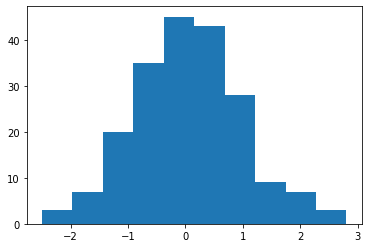

In [17]:
# Creamos una distribución uniforme con el mismo numero de valores que nuestro dataset
a = np.random.randn(len(data))
plt.hist(a)

In [21]:
# Me quedaré con el 80% de los datos para entrenar y el 20% para validar
check = (a<0.8)
training = data[check]
testing = data[~check]

In [24]:
len(training), len(testing)

(159, 41)

In [26]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [27]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     734.2
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           4.26e-80
Time:                        08:57:57   Log-Likelihood:                -306.52
No. Observations:                 159   AIC:                             619.0
Df Residuals:                     156   BIC:                             628.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8399      0.326      8.714      0.000       2.196       3.484
TV             0.0463      0.002     29.593      0.000       0.043       0.049
Radio          0.1906      0.009     21.334      0.000       0.173       0.208
==============================================================================
Omnibus:                       58.854   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.233
Skew:                          -1.462   Prob(JB):                     1.20e-39
Kurtosis:                       7.302   Cond. No.                         422.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
lm.params

Intercept    2.839863
TV           0.046319
Radio        0.190590
dtype: float64

In [29]:
# Sales = lm.params[0] + lm.params[1]*TV + lm.params[2]*Radio

#ahora validamos el modelo co el conjunto de testing

sales_pred = lm.predict(testing)
sales_pred

1      12.391249
3      17.728578
10      7.006980
21     14.808037
24      8.126979
42     21.718506
57     12.807857
62     16.878179
63     13.238301
73      9.919923
75     11.951436
80     11.467397
84     20.924368
88     11.789887
89     17.035904
90      9.994415
104    20.410318
106     6.094331
111    21.277618
112    13.913222
117     6.531118
120    14.492568
121     7.846464
126    10.615100
134    11.905811
135    14.034804
139    19.771171
141    18.558765
146    15.352397
151    10.045435
154    15.560046
155     5.240614
160    14.279594
162    15.016068
169    18.028650
171    14.442692
178    16.094728
187    17.161383
188    18.736339
192     4.417971
197    12.810838
dtype: float64

In [30]:
len(sales_pred)

41

In [33]:
SSD = sum((testing["Sales"]-sales_pred)**2)

In [34]:
SSD

118.55451199863464

In [35]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.766311291622017

In [36]:
sales_mean = np.mean(testing["Sales"])

In [37]:
error = RSE/sales_mean
error

0.13215102729288816

In [39]:
# Nos quedamos con un 'error' de los datos sin explicación

Nuestro modelo generaliza medianamente bien respecto al total o si validamos el modelo con un subconjunto del dataset.